In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import vonmises

from wpca.distribution import PeriodicDistribution
from wpca.transport import PeriodicTransportMap
from wpca.barycenter import ProcrustesBarycenter

In [2]:
xgrid = np.linspace(0, 1, 1000)
theta = 2 * np.pi * xgrid 

In [4]:
measures = []

cdf = vonmises.cdf(theta, 10, loc=-np.pi/2, scale=1)
cdf = cdf - cdf[0]
measures.append(PeriodicDistribution(supp_grid=xgrid, cdf_eval=cdf))

cdf = vonmises.cdf(theta, 10, loc=np.pi/2, scale=1)
cdf = cdf - cdf[0]
measures.append(PeriodicDistribution(supp_grid=xgrid, cdf_eval=cdf))

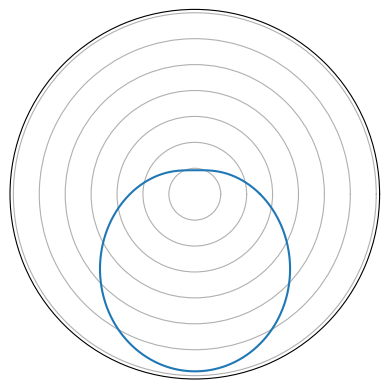

In [5]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

cdf = vonmises.cdf(theta, 1, loc=-np.pi/2, scale=1)
cdf = cdf - cdf[0]

ax.plot(theta[1:], np.diff(cdf) / (theta[1] - theta[0]))
ax.set_xticks([])
ax.set_yticklabels([])
plt.show()

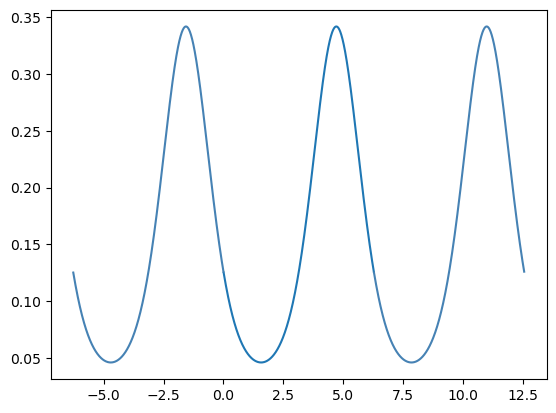

In [6]:
pdf = np.diff(cdf) / (theta[1] - theta[0])
plt.plot(theta[1:], np.diff(cdf) / (theta[1] - theta[0]))
plt.plot(theta[1:] - 2 * np.pi, np.diff(cdf) / (theta[1] - theta[0]), color="steelblue")
plt.plot(theta[1:] + 2 * np.pi, np.diff(cdf) / (theta[1] - theta[0]), color="steelblue")

In [7]:
bary = ProcrustesBarycenter(threshold=1e-3)
bary.compute(measures)

0.013042353170784421
0.0010496672384040211
0.0010565390749211119
0.0010567689140974995
0.001056802236518012
0.0010568070570778697
0.0010568077612576393
0.001056807864827944
0.0010568078801379086
0.001056807882409509
0.0010568078827474848
0.0010568078827978705
0.0010568078828053957
0.0010568078828065183
0.0010568078828066872
0.0010568078828067113
0.0010568078828067159
0.0010568078828067156
0.001056807882806716
0.0010568078828067159
0.0010568078828067156
0.001056807882806716
0.0010568078828067159
0.0010568078828067156
0.001056807882806716
0.0010568078828067159
0.0010568078828067156
0.001056807882806716
0.0010568078828067159
0.0010568078828067156
0.001056807882806716
0.0010568078828067159
0.0010568078828067156
0.001056807882806716
0.0010568078828067159
0.0010568078828067156
0.001056807882806716
0.0010568078828067159
0.0010568078828067156
0.001056807882806716
0.0010568078828067159
0.0010568078828067156
0.001056807882806716
0.0010568078828067159
0.0010568078828067156
0.001056807882806716
0.

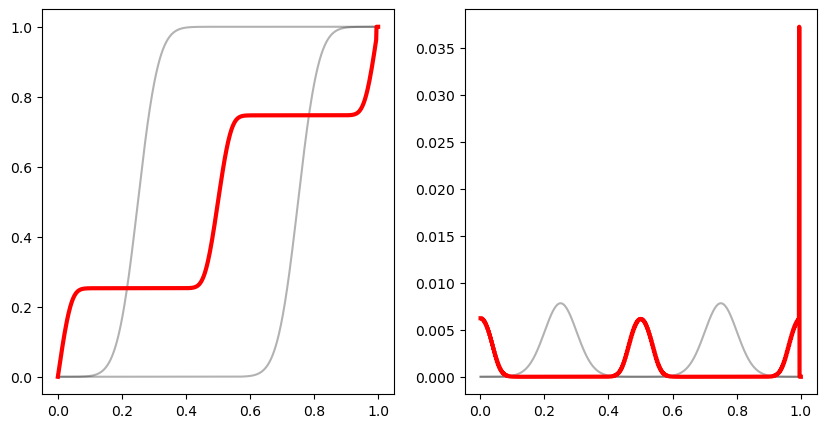

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

for m in measures:
    cdf = m.cdf(xgrid)
    pdf = np.diff(cdf)
    axes[0].plot(xgrid, cdf, color="black", alpha=0.3)
    axes[1].plot(xgrid[1:], pdf, color="black", alpha=0.3)

cdf = bary.bary_measure.cdf(xgrid)
pdf = np.diff(cdf)
axes[0].plot(xgrid, cdf, color="red", lw=3)
axes[1].plot(xgrid[1:], pdf, color="red", lw=3)

In [9]:
wdists = []

tmap = PeriodicTransportMap(init_point=bary.bary_measure)
tmap.compute(measures[0])
wdists.append(tmap.wdist(tmap.theta, xgrid))
tmap.compute(measures[1])
wdists.append(tmap.wdist(tmap.theta, xgrid))

In [10]:
cdf = vonmises.cdf(theta, 10, loc=np.pi, scale=1)
cdf = cdf - cdf[0]

fake_bary = PeriodicDistribution(supp_grid=xgrid, cdf_eval=cdf)
tmap = PeriodicTransportMap(init_point=fake_bary)
tmap.compute(measures[0])
wdists.append(tmap.wdist(tmap.theta, xgrid))
tmap.compute(measures[1])
wdists.append(tmap.wdist(tmap.theta, xgrid))

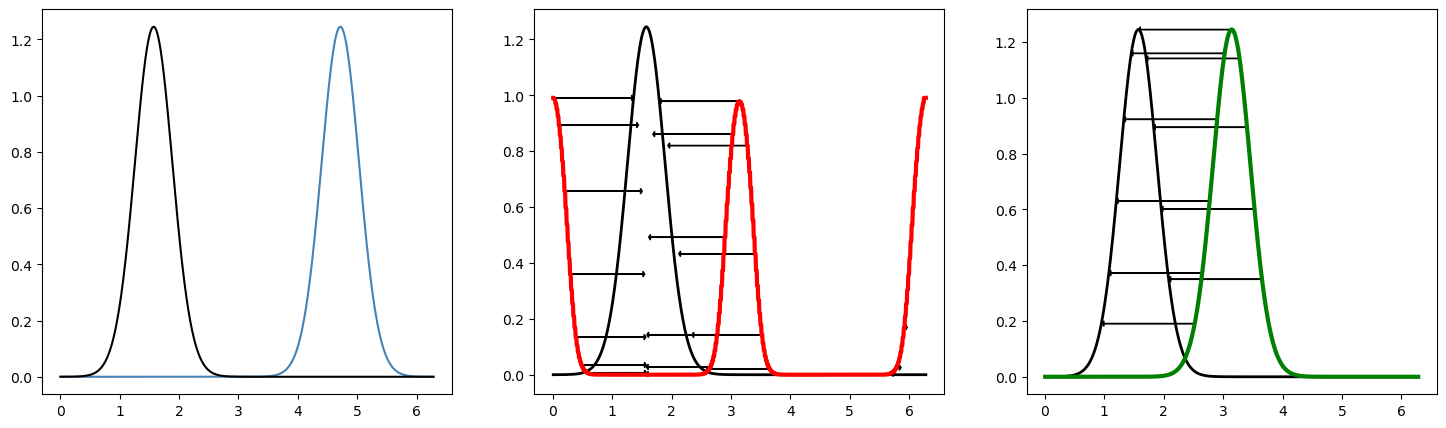

In [28]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

theta_grid = 2 * np.pi * xgrid

cdf = measures[0].cdf_eval
pdf = np.diff(cdf) / (xgrid[1] - xgrid[0]) / (2 * np.pi) 
axes[0].plot(theta_grid[1:], pdf, color="steelblue")
cdf = measures[1].cdf_eval
pdf = np.diff(cdf) / (xgrid[1] - xgrid[0]) / (2 * np.pi) 
axes[0].plot(theta_grid[1:], pdf, color="black")




tmap = PeriodicTransportMap(init_point=bary.bary_measure)
tmap.compute(measures[1])

cdf = measures[1].cdf_eval
pdf = np.diff(cdf) / (xgrid[1] - xgrid[0]) / (2 * np.pi) 
axes[1].plot(theta_grid[1:], pdf, color="black", lw=2)
axes[2].plot(theta_grid[1:], pdf, color="black", lw=2)

cdf = bary.bary_measure.cdf(xgrid)
pdf = np.diff(cdf) / (xgrid[1] - xgrid[0]) / (2 * np.pi) 
pdf[pdf > 1] = np.sort(pdf)[-2]
pdf[-5:] = pdf[0]
axes[1].plot(theta_grid[1:], pdf, color="red", lw=3)

tmap_eval = tmap(xgrid) * 2 * np.pi



wh = np.where(xgrid < 0.1)[0]
wh = wh[np.arange(0, len(wh), 15)]
for idx in wh:
    axes[1].arrow(theta_grid[idx], pdf[idx], tmap_eval[idx] - theta_grid[idx], 0, head_width=0.02,
                 length_includes_head=True)
    

wh = np.where((xgrid > 0.4)  & (xgrid < 0.6))[0]
wh = wh[np.arange(0, len(wh), 20)]
for idx in wh:
    axes[1].arrow(theta_grid[idx], pdf[idx], tmap_eval[idx] - theta_grid[idx], 0, head_width=0.02, 
                  length_includes_head=True)
    
    
wh = np.where((xgrid > 0.9))[0]
wh = wh[np.arange(0, len(wh), 20)]
for idx in wh:
    axes[1].arrow(theta_grid[idx], pdf[idx], np.min([tmap_eval[idx] - xgrid[idx], 1 - xgrid[idx]]),
              0, head_width=0.02, length_includes_head=True)
    
    

tmap = PeriodicTransportMap(init_point=fake_bary)
tmap.compute(measures[1])

cdf = fake_bary.cdf_eval
pdf = np.diff(cdf) / (xgrid[1] - xgrid[0]) / (2 * np.pi) 
axes[2].plot(theta_grid[1:], pdf, color="green", lw=3)

tmap_eval = tmap(xgrid) * 2 * np.pi

wh = np.where((xgrid > 0.4)  & (xgrid < 0.6))[0]
wh = wh[np.arange(0, len(wh), 20)]
for idx in wh:
    axes[2].arrow(theta_grid[idx], pdf[idx], tmap_eval[idx] - theta_grid[idx], 0, head_width=0.02, length_includes_head=True)
    
    
plt.savefig("example_bary_new.pdf", bbox_inches="tight")

# Barycenter Plots

In [21]:
import pickle

with open("data/bary_out/uniform_two_groups.pickle", "rb") as fp:
    data_unif2 = pickle.load(fp)
    
with open("data/bary_out/uniform_three_groups.pickle", "rb") as fp:
    data_unif3 = pickle.load(fp)
    
with open("data/bary_out/beta_two_groups.pickle", "rb") as fp:
    data_beta = pickle.load(fp)
    
    
data = [data_unif2, data_unif3, data_beta]

/var/folders/c3/_f3tgzn14ylfqqgqhkdntngh0000gn/T/ipykernel_64915/253207869.py:4: DeprecationWarning: Please use `interp1d` from the `scipy.interpolate` namespace, the `scipy.interpolate.interpolate` namespace is deprecated.
  data_unif2 = pickle.load(fp)
/var/folders/c3/_f3tgzn14ylfqqgqhkdntngh0000gn/T/ipykernel_64915/253207869.py:4: DeprecationWarning: Please use `UnivariateSpline` from the `scipy.interpolate` namespace, the `scipy.interpolate.fitpack2` namespace is deprecated.
  data_unif2 = pickle.load(fp)
/var/folders/c3/_f3tgzn14ylfqqgqhkdntngh0000gn/T/ipykernel_64915/253207869.py:7: DeprecationWarning: Please use `interp1d` from the `scipy.interpolate` namespace, the `scipy.interpolate.interpolate` namespace is deprecated.
  data_unif3 = pickle.load(fp)
/var/folders/c3/_f3tgzn14ylfqqgqhkdntngh0000gn/T/ipykernel_64915/253207869.py:7: DeprecationWarning: Please use `UnivariateSpline` from the `scipy.interpolate` namespace, the `scipy.interpolate.fitpack2` namespace is deprecated.
 

In [22]:
def smooth_uniform_pdf(pdf_eval):
    max_vals = np.argsort(pdf_eval)

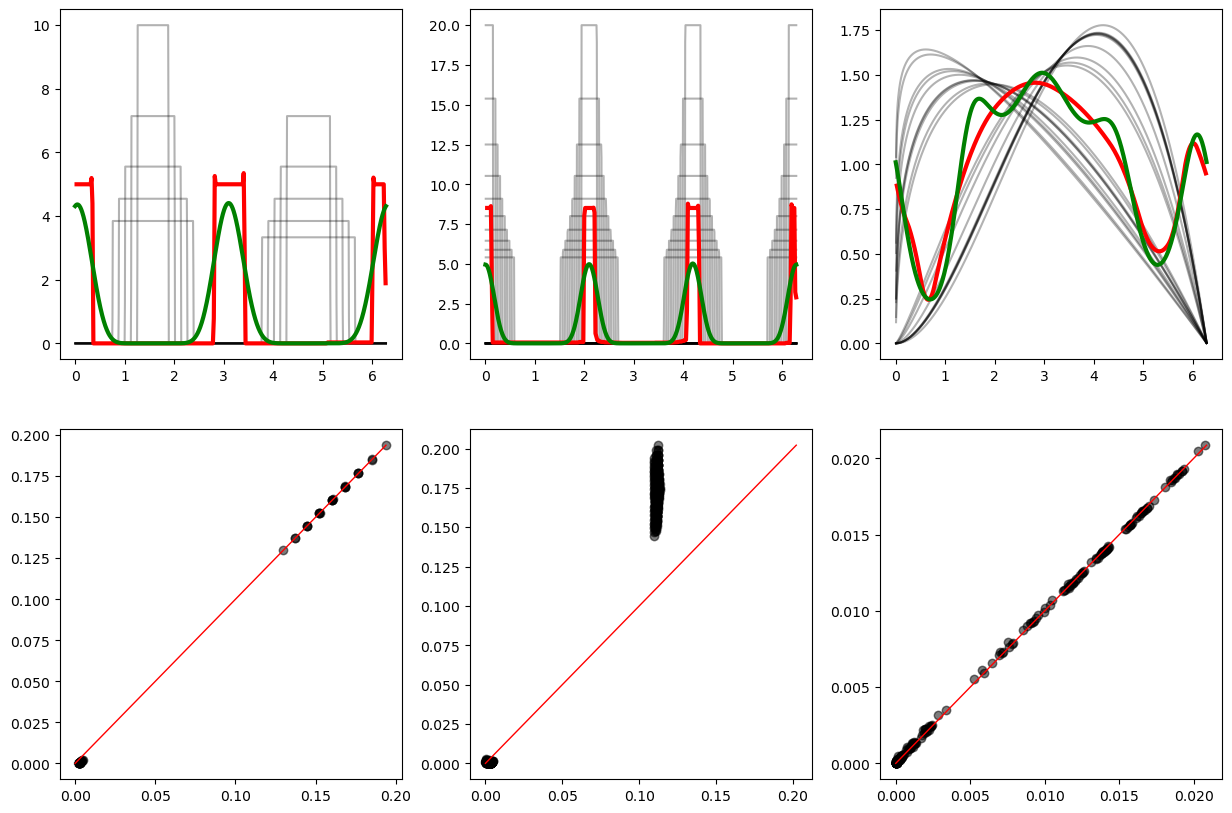

In [27]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

def get_prev_ind(start, wh):
    if start - 1 not in wh[0]:
        return start - 1
    return get_prev_ind(start - 1, wh)

for i in range(3):
    curr_data = data[i]
    xgrid = curr_data["measures"][0].supp_grid
    theta_grid = xgrid * 2 * np.pi
    delta = xgrid[1] - xgrid[0]
    for m in curr_data["measures"]:
        cdf_eval = m.cdf_eval
        pdf_eval = np.diff(cdf_eval) / (xgrid[1] - xgrid[0])
        axes[0][i].plot(theta_grid[1:], pdf_eval, color="black", alpha=0.3)
    
    if i == 2:
        bary_w_pdf = curr_data["bary_w"].bary_measure.eval_smooth_pdf(
            curr_data["bary_w"].bary_measure.supp_grid[1:])
    else:
        bary_w_cdf = curr_data["bary_w"].bary_measure.cdf_eval
        bary_w_pdf = np.diff(bary_w_cdf) / (np.diff(curr_data["bary_w"].bary_measure.supp_grid))
    
    #supp = curr_data["bary_w"].bary_measure.supp_grid
    #wh = np.where(np.abs((np.diff(bary_w_pdf) / np.diff(supp[1:]))) > 5)
    #new_ind = np.array([get_prev_ind(x, wh) for x in wh])
    #print("wh: ", wh)
    #print("new ind: ", new_ind)
    #bary_w_pdf[wh[0]] = bary_w_pdf[new_ind]
    #print(np.diff(bary_w_pdf) / np.diff(supp[1:]))
    axes[0][i].plot(curr_data["bary_w"].bary_measure.supp_grid[1:] * 2 * np.pi, 
                    bary_w_pdf, color="red", lw=3)
    bary_s_pdf = curr_data["bary_s"].barycenter_pmf / (xgrid[1] - xgrid[0])
    axes[0][i].plot(theta_grid, bary_s_pdf, color="green", lw=3)
    
    
    wd = curr_data["w_dists"].reshape(-1, 1)
    ld = curr_data["log_dists"].reshape(-1, 1)
    max_d = np.max(np.concatenate([wd, ld]))
    axes[1][i].scatter(wd, ld, color="black", alpha=0.3)
    axes[1][i].plot(np.linspace(0, max_d, 5), np.linspace(0, max_d, 5), color="red", lw=1)
    
    
plt.savefig("simulation_bary_new.pdf", bbox_inches="tight")

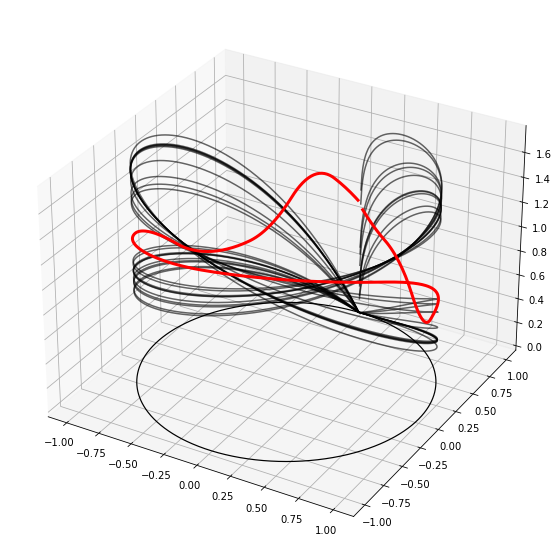

In [84]:
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')


xgrid = curr_data["measures"][0].supp_grid

delta = xgrid[1] - xgrid[0]
for m in curr_data["measures"]:
    cdf_eval = m.cdf_eval
    pdf_eval = np.diff(cdf_eval) / (xgrid[1] - xgrid[0])
    theta = xgrid[1:] * 2 * np.pi
    xline = np.sin(theta)
    yline = np.cos(theta)
    ax.plot3D(xline, yline, pdf_eval, color="black", alpha=0.6)

ax.plot3D(xline, yline, np.zeros_like(xline), color="black", lw=1.2)
        

theta = curr_data["bary_w"].bary_measure.supp_grid[1:] * 2 * np.pi
xline = np.sin(theta)
yline = np.cos(theta)

ax.plot3D(xline, yline, bary_w_pdf, 'red', lw = 3)


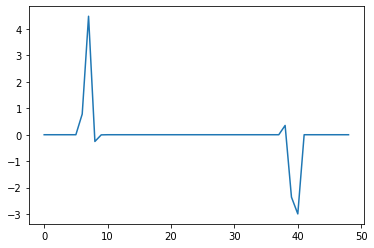

In [72]:
plt.plot(np.diff(bary_w_pdf[140:190]))

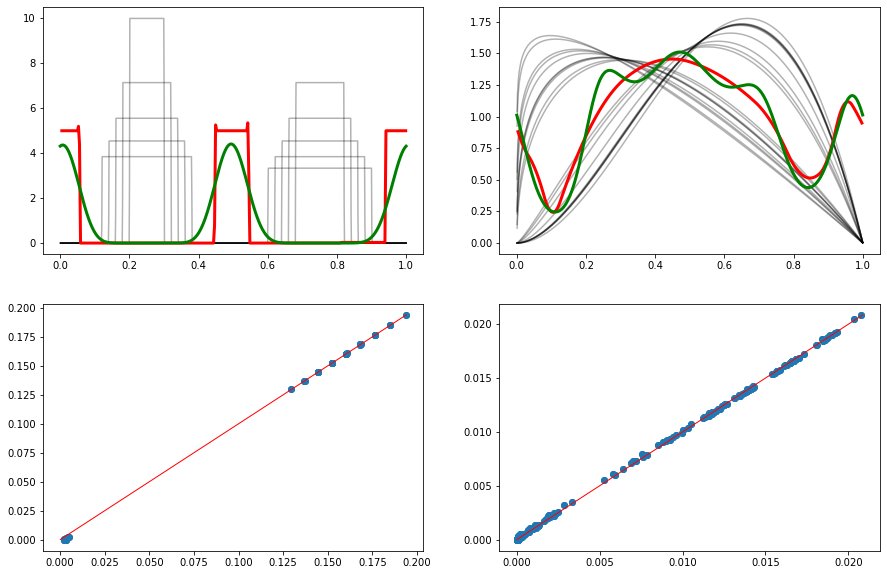

In [36]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

data = [data_unif2, data_beta]

for i in range(2):
    curr_data = data[i]
    xgrid = curr_data["measures"][0].supp_grid
    for m in curr_data["measures"]:
        cdf_eval = m.cdf_eval
        pdf_eval = np.diff(cdf_eval) / (xgrid[1] - xgrid[0])
        axes[0][i].plot(xgrid[1:], pdf_eval, color="black", alpha=0.3)
    
    if i == 1:
        bary_w_pdf = curr_data["bary_w"].bary_measure.eval_smooth_pdf(
            curr_data["bary_w"].bary_measure.supp_grid[1:])
    else:
        bary_w_cdf = curr_data["bary_w"].bary_measure.cdf_eval
        bary_w_pdf = np.diff(bary_w_cdf) / (np.diff(curr_data["bary_w"].bary_measure.supp_grid))
        bary_w_pdf[-20:] = bary_w_pdf[0]
        
    axes[0][i].plot(curr_data["bary_w"].bary_measure.supp_grid[1:], bary_w_pdf, color="red", lw=3)
    bary_s_pdf = curr_data["bary_s"].barycenter_pmf / (xgrid[1] - xgrid[0])
    axes[0][i].plot(xgrid, bary_s_pdf, color="green", lw=3)
    
    
    wd = curr_data["w_dists"].reshape(-1, 1)
    ld = curr_data["log_dists"].reshape(-1, 1)
    max_d = np.max(np.concatenate([wd, ld]))
    axes[1][i].scatter(wd, ld)
    axes[1][i].plot(np.linspace(0, max_d, 5), np.linspace(0, max_d, 5), color="red", lw=1)

In [16]:
import numpy as np
import os
import pickle
from scipy.stats import beta, norm, uniform
from scipy.integrate import trapz

from wpca.distribution import PeriodicDistribution
from wpca.transport import PeriodicTransportMap
from wpca.barycenter import ProcrustesBarycenter, SinkhornBarycenter



def uniform_three_groups(xgrid):
    measures = []
    centers = [0, 1/3, 2/3]

    for i in range(10):
        w = 0.05 + 0.15 / 10 * i
        pdf = np.zeros_like(xgrid) 
        pdf[((xgrid <= w/2) | (xgrid >= 1 - w/2))] = 1 / w
        cdf = np.cumsum(pdf) * (xgrid[1] - xgrid[0])
        dist = PeriodicDistribution(supp_grid=xgrid, cdf_eval=cdf)
        measures.append(dist)
        

    for i in range(20):
        if i < 10:
            c = centers[1]
            w = 0.05 + 0.15 / 10 * i
        else:
            c = centers[2]
            w = 0.05 + 0.15 / 10 * (i - 10)
            
        p_func = lambda x: uniform.cdf(x, c - w/2, w)
        dist = PeriodicDistribution(supp_grid=xgrid, cdf_eval=p_func(xgrid))
        measures.append(dist)
    return measures

In [17]:
xgrid = np.linspace(0.0001, 0.9999, 1000)

measures = uniform_three_groups(xgrid)

In [18]:
wass_bary = ProcrustesBarycenter(1e-3, 50)
wass_bary.compute(measures)

bary_measure = wass_bary.bary_measure
transports_from_bary = []
for m in measures:
    t = PeriodicTransportMap(bary_measure)
    t.compute(m)
    transports_from_bary.append(t)

n = len(measures)
quant_grid = np.linspace(0, 1, 1000)

bary_pdf = bary_measure.eval_smooth_pdf(quant_grid)

w_dists = np.zeros((n, n))
log_dists = np.zeros((n, n))
for i in range(n):
    print("i: {0} / {1}".format(i+1, n))
    for j in range(n):
        tmap = PeriodicTransportMap(measures[i])
        tmap.compute(measures[j])
        w_dists[i, j] = tmap.wdist(tmap.theta, quant_grid)

        log_dists[i, j] = trapz(
            (transports_from_bary[i](quant_grid) - 
             transports_from_bary[j](quant_grid))**2 * bary_pdf,
            quant_grid)

0.006884764943853157
0.0006762259491547159
i: 1 / 30
i: 2 / 30
i: 3 / 30
i: 4 / 30
i: 5 / 30
i: 6 / 30
i: 7 / 30
i: 8 / 30
i: 9 / 30
i: 10 / 30
i: 11 / 30
i: 12 / 30
i: 13 / 30
i: 14 / 30
i: 15 / 30
i: 16 / 30
i: 17 / 30
i: 18 / 30
i: 19 / 30
i: 20 / 30
i: 21 / 30
i: 22 / 30
i: 23 / 30
i: 24 / 30
i: 25 / 30
i: 26 / 30
i: 27 / 30
i: 28 / 30
i: 29 / 30
i: 30 / 30


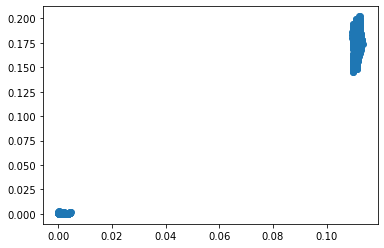

In [19]:
plt.scatter(w_dists.reshape(-1, 1), log_dists.reshape(-1, 1))

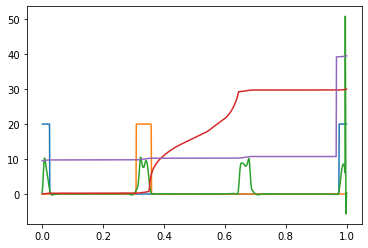

In [33]:
i = 0
j = 10

cdf_eval = measures[i].cdf_eval
pdf_eval = np.diff(cdf_eval) / (xgrid[1] - xgrid[0])
plt.plot(xgrid[1:], pdf_eval)

cdf_eval = measures[j].cdf_eval
pdf_eval = np.diff(cdf_eval) / (xgrid[1] - xgrid[0])
plt.plot(xgrid[1:], pdf_eval)

pdf_eval = bary_measure.eval_smooth_pdf(quant_grid)
plt.plot(quant_grid, pdf_eval)


plt.plot(quant_grid, transports_from_bary[i](quant_grid) * 30)
plt.plot(quant_grid, transports_from_bary[j](quant_grid) * 30)

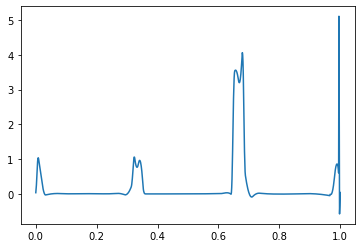

In [34]:
bary_pdf = bary_measure.eval_smooth_pdf(quant_grid)

plt.plot(quant_grid, (transports_from_bary[i](quant_grid) - 
                      transports_from_bary[j](quant_grid))**2 * bary_pdf)

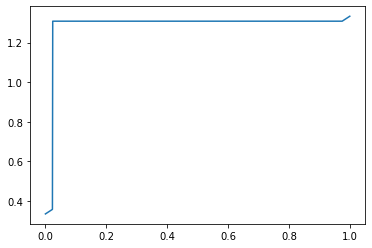

In [25]:
tmap = PeriodicTransportMap(measures[i])
tmap.compute(measures[j])

plt.plot(xgrid, tmap(xgrid))